# Acute Lymphoblastic Leukemia Image Classification
practice project

By Sayaka Minegishi
June 2021

## Use Case

This project will utilize the Leukemia Dataset uploaded to Kaggle by Larxel to make an image classification program that classifies whether a patient has acute lymphoblastic leukemia, given an image of their bone marrow aspirate smear. Please note that the program will detect whether a particular image shows a lymphoblast, and if it does, it will count that image as being 'positive' for acute lymphoblstic leukemia. 

We will first install the relevant packages:

In [1]:
pip install opencv-python-headless

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 38.2 MB 271 kB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 26.1 MB 12.3 MB/s eta 0:00:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.0
    Uninstalling scipy-1.5.0:
      Successfully uninstalled scipy-1.5.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --user --upgrade tensorflow

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 454.3 MB 27 kB/s s eta 0:00:01
     |████████████████████████████████| 1.2 MB 42.8 MB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 41.4 MB/s eta 0:00:01
     |████████████████████████████████| 14.8 MB 42.2 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 2.5 MB/s  eta 0:00:01
     |████████████████████████████████| 65 kB 7.5 MB/s  eta 0:00:01
     |████████████████████████████████| 462 kB 45.8 MB/s eta 0:00:01
     |████████████████████████████████| 132 kB 49.2 MB/s eta 0:00:

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install keras==2.3.1

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 377 kB 19.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


## Load Data

We will now download the bone marrow aspirate smear images using IBM Cloud's object storage. The images for training and validation are all contained in a single folder called 'ALL_data' (imported as ALL_data.zip).

In [2]:
import shutil
import os

#delete the directories containing our image files if they are already present
if 'ALL_data' in os.listdir("./"):
    shutil.rmtree('ALL_data')

if 'ALL_data_2.zip' in os.listdir("./"):
    os.remove('ALL_data.zip')

if '.virtual_documents' in os.listdir("./"):
    os.rmdir('.virtual_documents')

In [3]:
os.listdir("./") #check the list of items in the current directory

[]

In [4]:
#credentials for the data set
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_2 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-62a11686-a522-45e1-9d33-be942e569d01',
    'IBM_API_KEY_ID': 'AyDmNB01z7kaQWR4dCKsn7kmKj5OQ1dQRsDhMpSid0zy',
    'ENDPOINT': 'https://s3.private.us.cloud-object-storage.appdomain.cloud',
    'IBM_AUTH_ENDPOINT': 'https://iam.cloud.ibm.com/oidc/token',
    'BUCKET': 'coursera-donotdelete-pr-axcazqc6bchxob',
    'FILE': 'ALL_data.zip'
}


In [5]:
from ibm_botocore.client import Config
import ibm_boto3

cos2 = ibm_boto3.client(service_name = 's3', 
                       ibm_api_key_id = credentials_2['IBM_API_KEY_ID'],
                       ibm_service_instance_id = credentials_2['IAM_SERVICE_ID'],
                       ibm_auth_endpoint = credentials_2['IBM_AUTH_ENDPOINT'],
                       config = Config(signature_version='oauth'),
                       endpoint_url = credentials_2['ENDPOINT'])

In [6]:
#download the zip file containing all files

cos2.download_file(Bucket = credentials_2['BUCKET'], Key = 'ALL_data.zip', Filename = 'ALL_data.zip')

In [7]:
#extract the contents of the zip file
from zipfile import*
print('We will now extract all files in ALL_data.zip to the current directory')
with ZipFile('ALL_data.zip', 'r') as zipObj:
    zipObj.extractall() #extract the contents of the zip file
print("Extraction process complete")

We will now extract all files in ALL_data.zip to the current directory
Extraction process complete


In [8]:
if '__MACOSX' in os.listdir("./"):
    shutil.rmtree("./__MACOSX")

In [9]:
os.listdir("./")

['ALL_data.zip', 'ALL_data']

## Initial Data Exploration

First we will check what files are in our directory.

In [10]:
#check the leukemia-positive individuals
os.listdir("./ALL_data/positive")[:10] #check that the files are in the directory. We will show only the first 10 items since it is a long list

['._UID_35_8_1_all.jpg',
 '._UID_13_11_1_all.jpg',
 'UID_13_14_3_all.jpg',
 '._UID_52_35_2_all.jpg',
 'UID_78_18_7_all.jpg',
 '._UID_45_4_2_all.jpg',
 '._UID_30_5_6_all.jpg',
 '._UID_68_29_4_all.jpg',
 '._UID_37_4_1_all.jpg',
 '._UID_67_14_8_all.jpg']

In [11]:
#check the leukemia-negative individuals

os.listdir("./ALL_data/negative")[:10] #check that the files are in the directory. We will show only the first 10 items since it is a long list

['UID_H14_4_7_hem.jpg',
 'UID_H24_30_14_hem.jpg',
 'UID_H22_17_7_hem.jpg',
 'UID_H12_22_4_hem.jpg',
 'UID_H22_6_2_hem.jpg',
 '._UID_H14_13_8_hem.jpg',
 'UID_H40_18_4_hem.jpg',
 '._UID_H24_31_11_hem.jpg',
 'UID_H40_4_9_hem.jpg',
 '._UID_H46_7_1_hem.jpg']

We will now check the number of observations in our data set, for each class (positive and negative).

In [12]:
#Check the number of observations in our data
print("The number of leukemia-positive images in our data set is: ", len(os.listdir("./ALL_data/positive")))
print()
print("The number of leukemia-negative images in our data set is: ", len(os.listdir("./ALL_data/negative")))


The number of leukemia-positive images in our data set is:  14544

The number of leukemia-negative images in our data set is:  6778


We will now check that all the files are in the JPEG format.

In [13]:
#check that all files are JPEG
for img in os.listdir("./ALL_data/positive"):
    if img.endswith(".bmp"):
        print("One of the files is BMP, not JPEG.")
    
        
for img in os.listdir("./ALL_data/negative"):
    if img.endswith(".bmp"):
        print("One of the files is BMP, not JPEG.")
        
print("Check for wrong file format complete.")


Check for wrong file format complete.


I noticed that the files starting with '._' are corrupt. We will remove these files from our directory.

In [14]:
#get rid of corrupt files (files starting with '._')
directory_p = "./ALL_data/positive"
for img in os.listdir("./ALL_data/positive"):
    if img.startswith("."):
        os.remove(os.path.join(directory_p, img))
    
        
directory_n = "./ALL_data/negative"
for img in os.listdir("./ALL_data/negative"):
    if img.startswith("."):
        os.remove(os.path.join(directory_n, img))
    
        
print("Check for wrong file format complete.")


Check for wrong file format complete.


In [15]:
os.listdir("./ALL_data/positive")[:10] #show the first 10 items from the ALL-positive list

['UID_13_14_3_all.jpg',
 'UID_78_18_7_all.jpg',
 'UID_68_23_11_all.jpg',
 'UID_11_16_2_all.jpg',
 'UID_23_17_4_all.jpg',
 'UID_22_25_2_all.jpg',
 'UID_52_18_11_all.jpg',
 'UID_52_29_10_all.jpg',
 'UID_51_156_3_all.jpg',
 'UID_38_6_7_all.jpg']

In [16]:
os.listdir("./ALL_data/negative")[:10] #show the first 10 items from the ALL-negative list

['UID_H14_4_7_hem.jpg',
 'UID_H24_30_14_hem.jpg',
 'UID_H22_17_7_hem.jpg',
 'UID_H12_22_4_hem.jpg',
 'UID_H22_6_2_hem.jpg',
 'UID_H40_18_4_hem.jpg',
 'UID_H40_4_9_hem.jpg',
 'UID_H24_35_9_hem.jpg',
 'UID_H15_9_4_hem.jpg',
 'UID_H22_13_5_hem.jpg']

In [17]:
#Check the number of observations in our data again
print("The number of leukemia-positive images in our data set is: ", len(os.listdir("./ALL_data/positive")))
print()
print("The number of leukemia-negative images in our training set is: ", len(os.listdir("./ALL_data/negative")))


The number of leukemia-positive images in our data set is:  7272

The number of leukemia-negative images in our training set is:  3389


We will now check that the image files open properly.

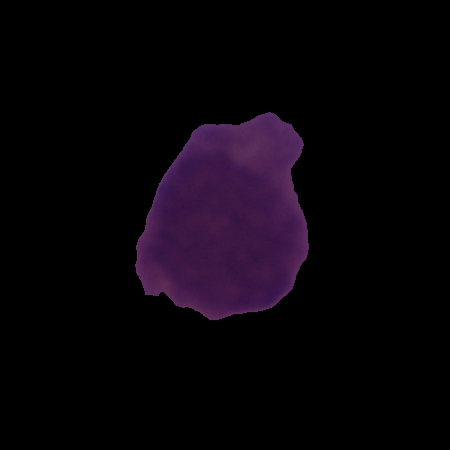

In [18]:
#examine a leukemia negative image at random from the dataset
import PIL
from PIL import Image

ALL_negative_list = [] #make a list to store the image paths for leukemia-negative individuals

#append the file path to the array
for file in os.listdir("./ALL_data/negative"):
    file = "./ALL_data/negative/" + file
    ALL_negative_list.append(file)

#examine one of the images from leukemia negative individuals (the 6th image)
PIL.Image.open(ALL_negative_list[5], mode= 'r')


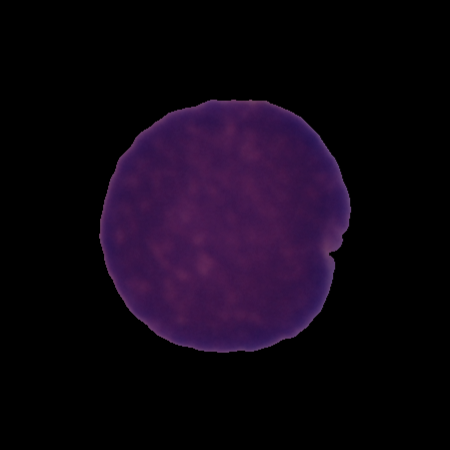

In [24]:
#examine a leukemia positive image at random from the training set

ALL_positive_list = []

for file in os.listdir("./ALL_data/positive"):
    file = "./ALL_data/positive/" + file
    ALL_positive_list.append(file)

#examine one of the images from leukemia negative individuals (the 6th image)
PIL.Image.open(ALL_positive_list[5], mode= 'r')

The images show properly.

### Summary of Initial Data Exploration
#### Quality Issues:
The dataset conatins images of bone marrow aspirate smears from individuals, which depict their lymphocytes. Originally, the dataset contained corrupt files starting with '._ ' which could not be opened. I removed these files from the dataset. Otherwise, there were no missing or wrong measurements and the images showed properly. All the files were in the JPEG format. 

#### Feature Quality:
Since my dataset is composed of images for classification, feature quality cannot be assesed by numerical measures. However, all the images show bone marrow aspirate smears and are thus comparable and relevant to the program.


#### Value distribution of data:
The graph visualizing the distribution of data for the leukemia-positive and leukemia-negative classes is shown below:

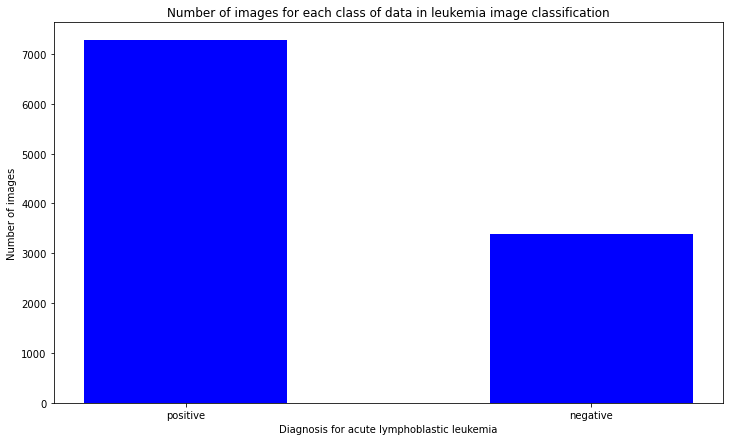

In [25]:
#visualization
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize = (12, 7))
#x values (the categories)
x = ['positive', 'negative']

#y values
y = [len(os.listdir("./ALL_data/positive")), len(os.listdir("./ALL_data/negative"))]

#create a bar plot comparing the number of images in each file
plt.bar(x, y, color = 'blue', width = 0.5)

#define the labels and the title
plt.xlabel("Diagnosis for acute lymphoblastic leukemia")
plt.ylabel("Number of images")
plt.title("Number of images for each class of data in leukemia image classification")

plt.show()


## Extract, Transform, Load (ETL)

### Data Cleansing
We will now check that there are no duplicate images in our dataset.

In [26]:
#For validation and training data, check that there are no duplicates in images from either the leukemia-positive or leukemia-negative lists
#by comparing the length of each list to the number of unique entries.

#check duplicates for leukemia-positive images 

if len(os.listdir("./ALL_data/positive")) != len(set(os.listdir("./ALL_data/positive"))):
    print("Duplicate images present among leukemia-positive images.")
else:
    print("No duplicate images present among leukemia-positive images.")

print()

#check duplicates for leukemia-negative images

if len(os.listdir("./ALL_data/negative")) != len(set(os.listdir("./ALL_data/negative"))):
    print("Duplicate images present among the leukemia-negative images.")
else:
    print("No duplicate images present among the leukemia-negative images.")



No duplicate images present among leukemia-positive images.

No duplicate images present among the leukemia-negative images.


Every image in the dataset is unique, as checked in the above cell.

## Feature Engineering

In [27]:
import keras

from keras.preprocessing.image import ImageDataGenerator


from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import pandas as pd
import cv2

from sklearn import svm

### For the deep learning model:

We split the dataset into training and validation sets.

In [28]:
#define parameters to use for the deep learning model.
batch_size = 32
img_height = 224
img_width = 224
data_directory = "./ALL_data"

In [29]:
#define training data for the deep learning model
training_data = tf.keras.preprocessing.image_dataset_from_directory(
data_directory, 
validation_split = 0.2,
subset = "training",
seed = 123,
image_size = (img_height, img_width),
batch_size = batch_size
)

Found 10661 files belonging to 2 classes.
Using 8529 files for training.


In [30]:
#define validation data
validation_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_directory,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
    
)

Found 10661 files belonging to 2 classes.
Using 2132 files for validation.


In [17]:
class_names = ["negative", "positive"] #define the categories

In [31]:
#autotune for best optimization 
AUTOTUNE = tf.data.AUTOTUNE
training_data = training_data.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
validation_data = validation_data.cache().prefetch(buffer_size = AUTOTUNE)

## Model Definition

### With Deep Learning

In [32]:
#model definition - deep learning
num_classes = 2 #there are 2 classes: one for positive and one for negative

model = Sequential([
layers.experimental.preprocessing.Rescaling(1./255, input_shape = (img_height, img_width, 3)),
layers.Conv2D(16,3,padding="same", activation="relu"),
layers.MaxPool2D(),
layers.Conv2D(16, 3, padding="same", activation="relu"),
layers.MaxPool2D(),
layers.Conv2D(64, 3, padding="same", activation="relu"),
layers.MaxPool2D(),
layers.Dropout(0.4),
layers.Flatten(),
layers.Dense(128,activation="relu"),
layers.Dense(num_classes)
])

In [33]:
#compile our model
model.compile(optimizer = 'Adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics = ['accuracy'])

In [34]:
model.summary() #see what we have in our model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0

We wil now train our model.

## Model Training

### With Deep Learning

In [35]:
#model training
epochs = 12
history = model.fit(training_data, validation_data = validation_data, epochs = epochs)

Epoch 1/12
267/267 [==============================] - 229s 831ms/step - loss: 0.4640 - accuracy: 0.8022 - val_loss: 0.4560 - val_accuracy: 0.7992
Epoch 2/12
267/267 [==============================] - 223s 836ms/step - loss: 0.4390 - accuracy: 0.8116 - val_loss: 0.4452 - val_accuracy: 0.8007
Epoch 3/12
267/267 [==============================] - 218s 817ms/step - loss: 0.4147 - accuracy: 0.8273 - val_loss: 0.4174 - val_accuracy: 0.8208
Epoch 4/12
267/267 [==============================] - 218s 817ms/step - loss: 0.3829 - accuracy: 0.8417 - val_loss: 0.4226 - val_accuracy: 0.8204
Epoch 5/12
267/267 [==============================] - 218s 816ms/step - loss: 0.3586 - accuracy: 0.8504 - val_loss: 0.3843 - val_accuracy: 0.8396
Epoch 6/12
267/267 [==============================] - 218s 818ms/step - loss: 0.3398 - accuracy: 0.8578 - val_loss: 0.4096 - val_accuracy: 0.8274
Epoch 7/12
267/267 [==============================] - 217s 813ms/step - loss: 0.3167 - accuracy: 0.8707 - val_loss: 0.4101 -

## Model Evaluation

### With Deep Learning

Now we will evaluate our sequential  model.

In [37]:
#model evaluation
score = model.evaluate(validation_data, verbose = 0) #evaluate the model on the validation data
print("The accuracy of our deep learning (Sequential) model is: ", score[1]) #get the accuracy of the model

The accuracy of our deep learning (Sequential) model is:  0.8616322875022888


## Predict on Unseen Data

We will now predict on unseen data using our model.
We will first import data. The names of the images are labeled with 0 or 1 at the end, with 0 indicating that the image is from a patient who tests negative for acute lymphoblastic leukemia and 1 indicating image from a patient with ALL leukemia.


In [38]:
#load data
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_3 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-62a11686-a522-45e1-9d33-be942e569d01',
    'IBM_API_KEY_ID': 'AyDmNB01z7kaQWR4dCKsn7kmKj5OQ1dQRsDhMpSid0zy',
    'ENDPOINT': 'https://s3.private.us.cloud-object-storage.appdomain.cloud',
    'IBM_AUTH_ENDPOINT': 'https://iam.cloud.ibm.com/oidc/token',
    'BUCKET': 'coursera-donotdelete-pr-axcazqc6bchxob',
    'FILE': 'testing_data.zip'
}


In [39]:
from ibm_botocore.client import Config
import ibm_boto3

cos3 = ibm_boto3.client(service_name = 's3', 
                       ibm_api_key_id = credentials_2['IBM_API_KEY_ID'],
                       ibm_service_instance_id = credentials_2['IAM_SERVICE_ID'],
                       ibm_auth_endpoint = credentials_2['IBM_AUTH_ENDPOINT'],
                       config = Config(signature_version='oauth'),
                       endpoint_url = credentials_2['ENDPOINT'])

In [40]:
#download the zip file containing the testing images

cos3.download_file(Bucket = credentials_3['BUCKET'], Key = 'testing_data.zip', Filename = 'testing_data.zip')

In [41]:
#extract the contents of the zip file
from zipfile import*
print('We will now extract all files in testing_data.zip to the current directory')
with ZipFile('testing_data.zip', 'r') as zipObj:
    zipObj.extractall() #extract the contents of the zip file
print("Extraction process complete")


We will now extract all files in testing_data.zip to the current directory
Extraction process complete


In [42]:
if '__MACOSX' in os.listdir("./"):
    shutil.rmtree("./__MACOSX")

In [43]:
os.listdir("./")

['ALL_data.zip',
 '960_1.jpg',
 'testing_data.zip',
 '988_0.jpg',
 '990_1.jpg',
 'ALL_data',
 '989_1.jpg',
 '950_0.jpg',
 '983_0.jpg']

In [55]:
path_960_1 = "./960_1.jpg" #define the path for one of the ALL-positive images

testimage = keras.preprocessing.image.load_img(
    path_960_1, target_size = (img_height, img_width)
)

testimage_array = keras.preprocessing.image.img_to_array(testimage) #convert image to array formte
testimage_array = tf.expand_dims(testimage_array, 0) #create batch

predictions = model.predict(testimage_array)
score = tf.nn.softmax(predictions[0])

print("The model predicts that this image most likely belongs to a patient who is {} for acute lymphoblstic leukemia with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100*np.max(score)))


The model predicts that this image most likely belongs to a patient who is positive for acute lymphoblstic leukemia with a 99.23 percent confidence.


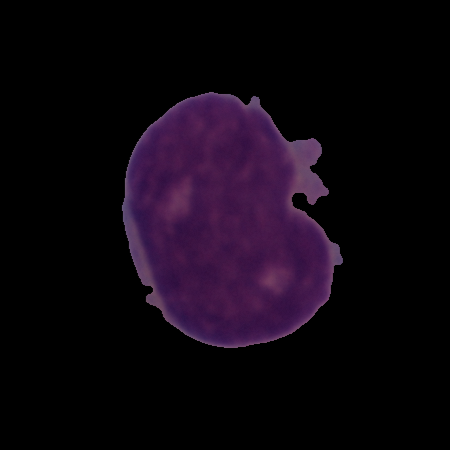

In [62]:
PIL.Image.open(path_960_1, mode= 'r')

The model predicted correctly for 960_1.jpg.

In [57]:
path_983_0 = "./983_0.jpg" #define the path for one of the ALL-positive images

testimage = keras.preprocessing.image.load_img(
    path_983_0, target_size = (img_height, img_width)
)

testimage_array = keras.preprocessing.image.img_to_array(testimage) #convert image to array formte
testimage_array = tf.expand_dims(testimage_array, 0) #create batch

predictions = model.predict(testimage_array)
score = tf.nn.softmax(predictions[0])

print("The model predicts that this image most likely belongs to a patient who is {} for acute lymphoblstic leukemia with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100*np.max(score)))


The model predicts that this image most likely belongs to a patient who is positive for acute lymphoblstic leukemia with a 93.16 percent confidence.


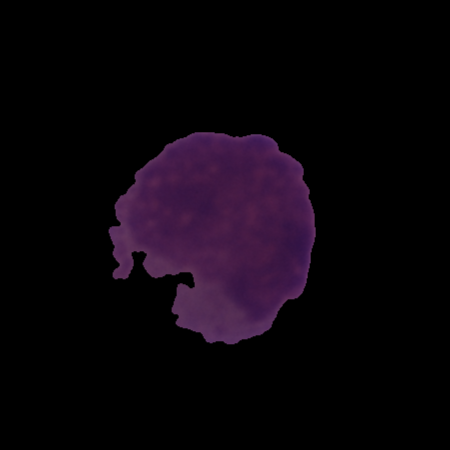

In [63]:
PIL.Image.open(path_983_0, mode= 'r')

The model predicted incorrectly for path_983_0.jpg

In [58]:
path_950_0 = "./950_0.jpg" #define the path for one of the ALL-positive images

testimage = keras.preprocessing.image.load_img(
    path_950_0, target_size = (img_height, img_width)
)

testimage_array = keras.preprocessing.image.img_to_array(testimage) #convert image to array formte
testimage_array = tf.expand_dims(testimage_array, 0) #create batch

predictions = model.predict(testimage_array)
score = tf.nn.softmax(predictions[0])

print("The model predicts that this image most likely belongs to a patient who is {} for acute lymphoblstic leukemia with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100*np.max(score)))


The model predicts that this image most likely belongs to a patient who is positive for acute lymphoblstic leukemia with a 95.99 percent confidence.


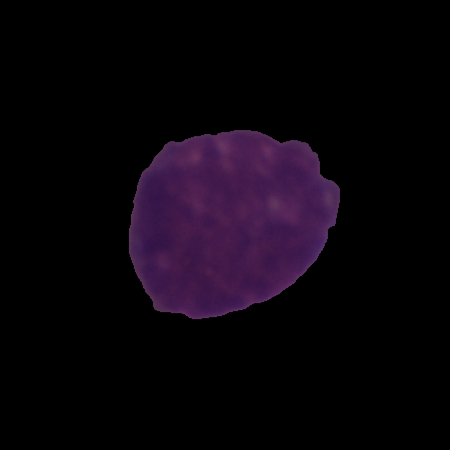

In [64]:
PIL.Image.open(path_950_0, mode= 'r')

The model predicted incorrectly for 950_0.jpg.

In [59]:
path_988_0 = "./988_0.jpg" #define the path for one of the ALL-positive images

testimage = keras.preprocessing.image.load_img(
    path_988_0, target_size = (img_height, img_width)
)

testimage_array = keras.preprocessing.image.img_to_array(testimage) #convert image to array formte
testimage_array = tf.expand_dims(testimage_array, 0) #create batch

predictions = model.predict(testimage_array)
score = tf.nn.softmax(predictions[0])

print("The model predicts that this image most likely belongs to a patient who is {} for acute lymphoblstic leukemia with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100*np.max(score)))


The model predicts that this image most likely belongs to a patient who is negative for acute lymphoblstic leukemia with a 52.98 percent confidence.


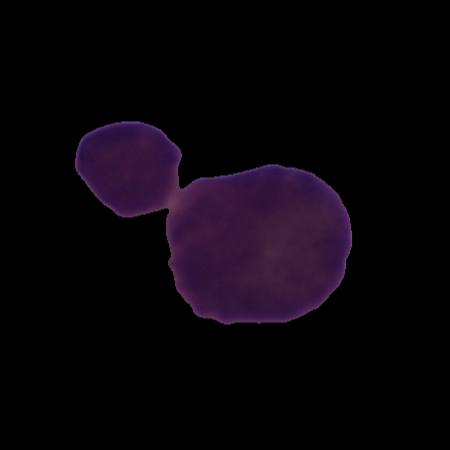

In [65]:
PIL.Image.open(path_988_0, mode= 'r')

The model predicted correctly for 988_0.jpg.

In [60]:
path_990_1 = "./990_1.jpg" #define the path for one of the ALL-positive images

testimage = keras.preprocessing.image.load_img(
    path_990_1, target_size = (img_height, img_width)
)

testimage_array = keras.preprocessing.image.img_to_array(testimage) #convert image to array formte
testimage_array = tf.expand_dims(testimage_array, 0) #create batch

predictions = model.predict(testimage_array)
score = tf.nn.softmax(predictions[0])

print("The model predicts that this image most likely belongs to a patient who is {} for acute lymphoblstic leukemia with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100*np.max(score)))


The model predicts that this image most likely belongs to a patient who is positive for acute lymphoblstic leukemia with a 88.70 percent confidence.


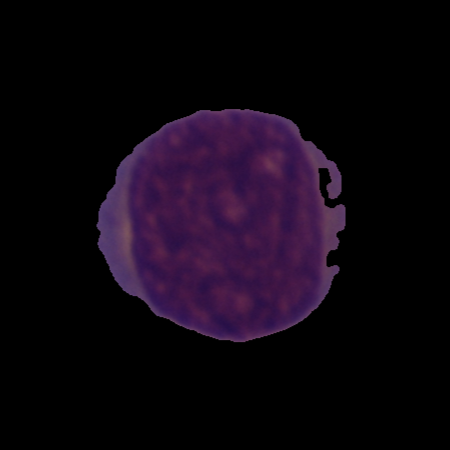

In [66]:
PIL.Image.open(path_990_1, mode= 'r')

The model predicted correctly for 990_1.jpg

In [61]:
path_989_1 = "./989_1.jpg" #define the path for one of the ALL-positive images

testimage = keras.preprocessing.image.load_img(
    path_989_1, target_size = (img_height, img_width)
)

testimage_array = keras.preprocessing.image.img_to_array(testimage) #convert image to array formte
testimage_array = tf.expand_dims(testimage_array, 0) #create batch

predictions = model.predict(testimage_array)
score = tf.nn.softmax(predictions[0])

print("The model predicts that this image most likely belongs to a patient who is {} for acute lymphoblstic leukemia with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100*np.max(score)))


The model predicts that this image most likely belongs to a patient who is positive for acute lymphoblstic leukemia with a 86.25 percent confidence.


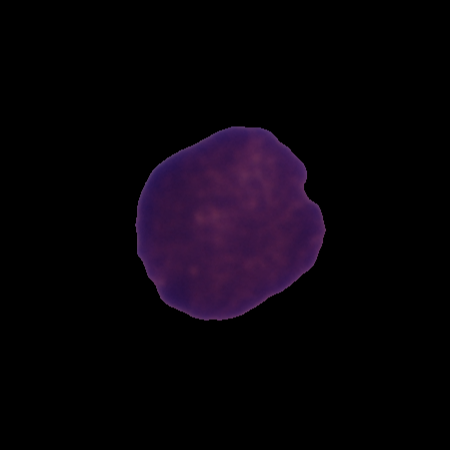

In [67]:
PIL.Image.open(path_989_1, mode= 'r')

The model predicted correctly for 989_1.jpg.

## Bibliography




Anubha Gupta, Rahul Duggal, Ritu Gupta, Lalit Kumar, Nisarg Thakkar, and Devprakash Satpathy, “GCTI-SN: Geometry-Inspired Chemical and Tissue Invariant Stain Normalization of Microscopic Medical Images,”, under review.

Gupta, A., & Gupta, R. (2019). ALL Challenge dataset of ISBI 2019 [Data set]. The Cancer Imaging Archive. https://doi.org/10.7937/tcia.2019.dc64i46r

“Image Classification.” n.d. Accessed June 21, 2021. https://www.tensorflow.org/tutorials/images/classification.


Ritu Gupta, Pramit Mallick, Rahul Duggal, Anubha Gupta, and Ojaswa Sharma, "Stain Color Normalization and Segmentation of Plasma Cells in Microscopic Images as a Prelude to Development of Computer Assisted Automated Disease Diagnostic Tool in Multiple Myeloma," 16th International Myeloma Workshop (IMW), India, March 2017.

Rahul Duggal, Anubha Gupta, Ritu Gupta, Manya Wadhwa, and Chirag Ahuja, “Overlapping Cell Nuclei Segmentation in Microscopic Images UsingDeep Belief Networks,” Indian Conference on Computer Vision, Graphics and Image Processing (ICVGIP), India, December 2016.

Rahul Duggal, Anubha Gupta, and Ritu Gupta, “Segmentation of overlapping/touching white blood cell nuclei using artificial neural networks,” CME Series on Hemato-Oncopathology, All India Institute of Medical Sciences (AIIMS), New Delhi, India, July 2016.

Rahul Duggal, Anubha Gupta, Ritu Gupta, and Pramit Mallick, "SD-Layer: Stain Deconvolutional Layer for CNNs in Medical Microscopic Imaging," In: Descoteaux M., Maier-Hein L., Franz A., Jannin P., Collins D., Duchesne S. (eds) Medical Image Computing and Computer-Assisted Intervention − MICCAI 2017, MICCAI 2017. Lecture Notes in Computer Science, Part III, LNCS 10435, pp. 435–443. Springer, Cham. DOI: https://doi.org/10.1007/978-3-319-66179-7_50 .

Shafique, Ayesha. 2019. “How to Access Data Assets in IBM Notebook Using Python?” Medium. July 8, 2019. https://medium.com/@aieeshashafique/how-to-access-data-assets-in-ibm-notebook-using-python-dff76aaaa608.

